## Hugging Face

In [ ]:
Natural Language Processing with Transformers Ch1

In [2]:
from datasets import list_datasets

datasets = list_datasets()
print(f"There are {len(datasets)} datasets currently available on the Hub.")
print(f"The first 10 are: {datasets[:10]}")

There are 1128 datasets currently available on the Hub.
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [3]:
metadata = list_datasets(with_details=True)[datasets.index("emotion")]
# Show dataset description
print("Description:", metadata.description, "\n")
# Show first 8 lines of the citation string
print("Citation:", "\n".join(metadata.citation.split("\n")[:8]))

Description: Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. For more detailed information please refer to the paper. 

Citation: @inproceedings{saravia-etal-2018-carer,
    title = "{CARER}: Contextualized Affect Representations for Emotion Recognition",
    author = "Saravia, Elvis  and
      Liu, Hsien-Chi Toby  and
      Huang, Yen-Hao  and
      Wu, Junlin  and
      Chen, Yi-Shin",
    booktitle = "Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing",


In [4]:
from datasets import load_dataset

emotions = load_dataset("emotion")

Using custom data configuration default


Dataset emotion downloaded and prepared to /home/user/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


In [7]:
type(emotions)

datasets.dataset_dict.DatasetDict

The DatasetDict is a class type written by Hugging Face.

In [5]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

The DatasetDict object has attributes train, validation, and test.
We examine the train attribute

In [6]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [8]:
type(train_ds)

datasets.arrow_dataset.Dataset

The Dataset act like a Python container. We can use the len() method to get 
the length and get an item using indexing with square brackets

In [10]:
len(train_ds)

16000

In [11]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

 We can find out the types being used by accessing the features attributes of a Dataset

In [12]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}

 You can use standard Python slicing

In [13]:
train_ds[5:10]

OrderedDict([('text',
              ['ive been feeling a little burdened lately wasnt sure why that was',
               'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
               'i feel as confused about life as a teenager or as jaded as a year old man',
               'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
               'i feel romantic too']),
             ('label', [0, 5, 4, 1, 2])])

In [14]:
train_ds["text"][10:15]

['i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirsty',
 'i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious']

## Converting a Dataset to a pandas DataFrame
The pandas Dataframe has more low level functions

In [16]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
#display_df(df.head(), index=None)
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


Interpret the labels in terms of emotions

In [23]:
emotions["train"].features["label"].int2str(0)

'sadness'

In [24]:
def label_int2str(row, split):
    return emotions[split].features["label"].int2str(row)

In [25]:
df["label_name"] = df["label"].apply(label_int2str, split="train")
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [ ]:
# Examine the distribution of the labels

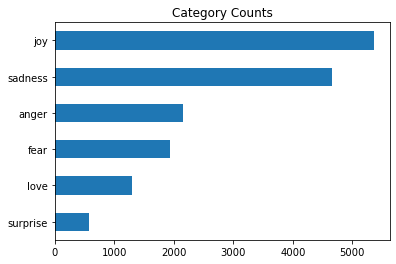

In [27]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Category Counts");

 The data is skewed. In a real life situation we would consider oversampling the smaller groups.
 We check the number of tokens in each sentence (token). BERT takes a maximum of 512 tokens and longer text is truncated possibly losing information.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9031e586d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9031e5a160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9031b81a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f903257d9e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9031e85f60>],
 'means': []}

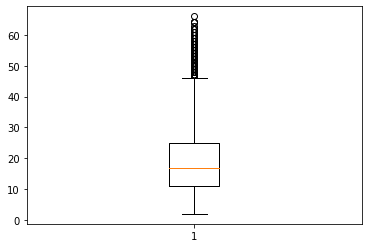

In [33]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
#df["Words Per Tweet"]
#df.boxplot("Words Per Tweet", by='label_name', grid=False, showfliers=False,
#           color='black', )
plt.boxplot(df["Words Per Tweet"])
#plt.suptitle("")
#plt.xlabel("");

The median is around 15 and they are all well under 512 tokens long

## Tokenization

In [39]:
#Character tokenization
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)
print("Length of tokenized text is ", len(tokenized_text))

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']
length of tokenized text is  38


In [40]:
# Character numericalization:
token2idx = {}
for idx, unique_char in enumerate(set(tokenized_text)):
    token2idx[unique_char] = idx
print(token2idx)
print("Number of unique tokens is ",len(token2idx))

{'i': 0, 'o': 1, 's': 2, 'T': 3, '.': 4, 'f': 5, 'e': 6, 'g': 7, 'L': 8, 'c': 9, 'N': 10, 'k': 11, 't': 12, 'x': 13, 'a': 14, 'z': 15, 'r': 16, 'P': 17, 'n': 18, ' ': 19}
Number of unique tokens is  20


In [36]:
# Transform the tokenized text to a list of integers
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[3, 1, 11, 6, 18, 0, 15, 0, 18, 7, 19, 12, 6, 13, 12, 19, 0, 2, 19, 14, 19, 9, 1, 16, 6, 19, 12, 14, 2, 11, 19, 1, 5, 19, 10, 8, 17, 4]


In [37]:
#Convert the input_ids to a 2D tensor of one-hot vectors. Each vector will be the length of the vocabulary
import torch

input_ids = torch.tensor(input_ids)
one_hot_encodings = torch.nn.functional.one_hot(input_ids)
one_hot_encodings.shape

torch.Size([38, 20])

In [41]:
#Sanity check:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot vector: {one_hot_encodings[0]}")

Token: T
Tensor index: 3
One-hot vector: tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Word tokenization by simple splitting at spaces

In [42]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


## Subword tokenizing

In [43]:
from transformers import AutoTokenizer

model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [45]:
tokenizer.vocab_size

30522

In [46]:
# The tokenizer has some special tokens:
tokenizer.special_tokens_map

{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

In [47]:
# We tokenize a short sentence
encoded_str = tokenizer.encode("this is a complicatedtest")
encoded_str

[101, 2023, 2003, 1037, 8552, 22199, 102]

In [48]:
for token in encoded_str:
    print(token, tokenizer.decode([token]))

101 [CLS]
2023 this
2003 is
1037 a
8552 complicated
22199 ##test
102 [SEP]
